In [85]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from util import *
from scipy.optimize import minimize

In [86]:
X,y = load_data()
beta = 5
K = kernel(X,X,alpha=1,length_scale=1, sigma=1)
K = K + np.identity(len(X), dtype=np.float64) * (1 / beta)
K_inv = np.linalg.pinv(K)
#print(np.identity(len(X)))
print(K)

[[1.20000000e+00 3.70716311e-01 3.75466826e-02 ... 2.31338794e-04
  2.15537344e-04 2.02851983e-04]
 [3.70716311e-01 1.20000000e+00 6.60580155e-02 ... 2.40786207e-04
  2.24024626e-04 2.10594391e-04]
 [3.75466826e-02 6.60580155e-02 1.20000000e+00 ... 2.71545274e-04
  2.51537198e-04 2.35601802e-04]
 ...
 [2.31338794e-04 2.40786207e-04 2.71545274e-04 ... 1.20000000e+00
  1.51381859e-01 4.77569154e-02]
 [2.15537344e-04 2.24024626e-04 2.51537198e-04 ... 1.51381859e-01
  1.20000000e+00 1.85174300e-01]
 [2.02851983e-04 2.10594391e-04 2.35601802e-04 ... 4.77569154e-02
  1.85174300e-01 1.20000000e+00]]


In [87]:
x_line=np.linspace(-60,60,num=500)
mean_predict,variance_predict=predict(x_line,X,y,K,beta,alpha=1,length_scale=1)
mean_predict=mean_predict.reshape(-1)
sigma_predict=np.sqrt(np.abs(np.diag(variance_predict)))
print(sigma_predict)

[1.09523241 1.09521314 1.09519153 1.09516723 1.09513982 1.0951088
 1.09507357 1.09503342 1.09498747 1.09493468 1.09487377 1.09480316
 1.09472092 1.09462464 1.0945113  1.09437711 1.09421724 1.09402551
 1.09379396 1.0935122  1.09316654 1.09273881 1.09220455 1.09153052
 1.09067096 1.08956207 1.0881137  1.08619672 1.08362359 1.08011817
 1.07526873 1.06845461 1.05873386 1.0446771  1.02414307 0.99404036
 0.95027469 0.88847057 0.80677325 0.71252799 0.63143879 0.6026366
 0.63792557 0.70056942 0.7468879  0.75406304 0.71915832 0.65792266
 0.60817912 0.61443276 0.68223656 0.77568572 0.86249606 0.93016524
 0.97845492 1.0113219  1.03301153 1.04682535 1.05499251 1.05884939
 1.05902648 1.05555372 1.04786549 1.03470487 1.01394261 0.98238835
 0.93586438 0.87027301 0.78514914 0.69129642 0.61885332 0.6045124
 0.64706713 0.70307951 0.73271933 0.7198455  0.67109978 0.61697309
 0.60416656 0.65475313 0.74168665 0.82783526 0.89432346 0.93707211
 0.95761816 0.95775059 0.93749259 0.89507836 0.82890598 0.7428324

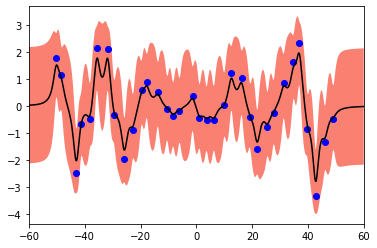

In [88]:
#plot
plt.plot(X,y,'bo')
plt.plot(x_line,mean_predict,'k-')
plt.fill_between(
    x_line,mean_predict+1.96*sigma_predict,mean_predict-1.96*sigma_predict,facecolor='salmon')
plt.xlim(-60,60)
plt.show()

In [89]:
sigma = 1
alpha = 1
length_scale = 1

In [90]:
opt = minimize(NegativeLogLikelihood, [sigma, alpha, length_scale], 
                    bounds=((1e-8, 1e6), (1e-8, 1e6), (1e-8, 1e6)), 
                    args=(X, y, beta))
sigma_opt = opt.x[0]
alpha_opt = opt.x[1]
length_scale_opt = opt.x[2]
print("sigma_opt :", sigma_opt)
print("alpha_opt : ", alpha_opt)
print("length_scale_opt :", length_scale_opt)


sigma_opt : 1.313590767915769
alpha_opt :  419.09409332653155
length_scale_opt : 3.3180125342988815


[1.09526981 1.09525287 1.09523376 1.09521211 1.09518752 1.09515948
 1.09512738 1.0950905  1.09504794 1.09499859 1.09494112 1.09487385
 1.09479469 1.094701   1.09458948 1.09445586 1.09429469 1.09409889
 1.09385918 1.09356329 1.09319484 1.09273172 1.09214372 1.09138912
 1.09040951 1.0891221  1.0874079  1.08509345 1.08192237 1.07751027
 1.0712734  1.062315   1.04924668 1.02991499 1.00101002 0.95758809
 0.89274387 0.79824056 0.6682981  0.51214299 0.38860865 0.41801823
 0.57558629 0.73348777 0.82778308 0.83633153 0.755376   0.59609691
 0.40088537 0.2986906  0.41294452 0.59414253 0.74868647 0.86161793
 0.93870159 0.98944693 1.02204857 1.0423586  1.05415359 1.05963556
 1.05982208 1.05474745 1.04346916 1.02387963 0.99232694 0.94311396
 0.86819553 0.75808456 0.60662766 0.42720873 0.30705146 0.39621659
 0.58268241 0.72750996 0.77895413 0.71794729 0.53788231 0.21021129
 0.28330635 0.12170712 0.44421059 0.67569308 0.82623164 0.91596829
 0.95802818 0.95946602 0.9205635  0.83473024 0.68878098 0.4604

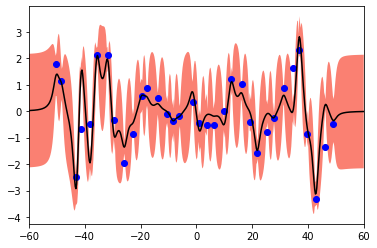

In [91]:
# do Gaussian process again
K = kernel(X, X, alpha=alpha_opt, length_scale=length_scale_opt)
K = K + np.identity(len(X), dtype=np.float64) * (1 / beta)
K_inv = np.linalg.pinv(K)
x_line = np.linspace(-60,60,num=500)
mean_predict, variance_predict = \
    predict(x_line, X, y, K, beta, alpha=alpha_opt, length_scale=length_scale_opt)
mean_predict = mean_predict.reshape(-1)
#print(np.diag(variance_predict))
#variance_predict[variance_predict < 0] = 0
sigma_predict = np.sqrt(np.abs(np.diag(variance_predict)))
print(sigma_predict)
#plot
plt.plot(X,y,'bo')
plt.plot(x_line,mean_predict,'k-')
plt.fill_between(x_line,mean_predict+1.96*sigma_predict,\
    mean_predict-1.96*sigma_predict,facecolor='salmon')
plt.xlim(-60,60)
plt.show()